***Analysing California Housing Prices*** dataset that predicts the house prices based on various prediction models. This is a supervised multiple regression problem that aims to predict the prices of houses based on multiple features like housing_median_age, total_rooms, ocean_proximity etc. 

In [7]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import numpy.random as rnd
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [18]:
mydir = os.getcwd()
housing = pd.read_csv(mydir + '/Dataset.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
#Descriptive Statistics - Exploring Dataset - Categorical Variable first
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [21]:
#Descriptive Statistics - Exploring Dataset - Continuous variables
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

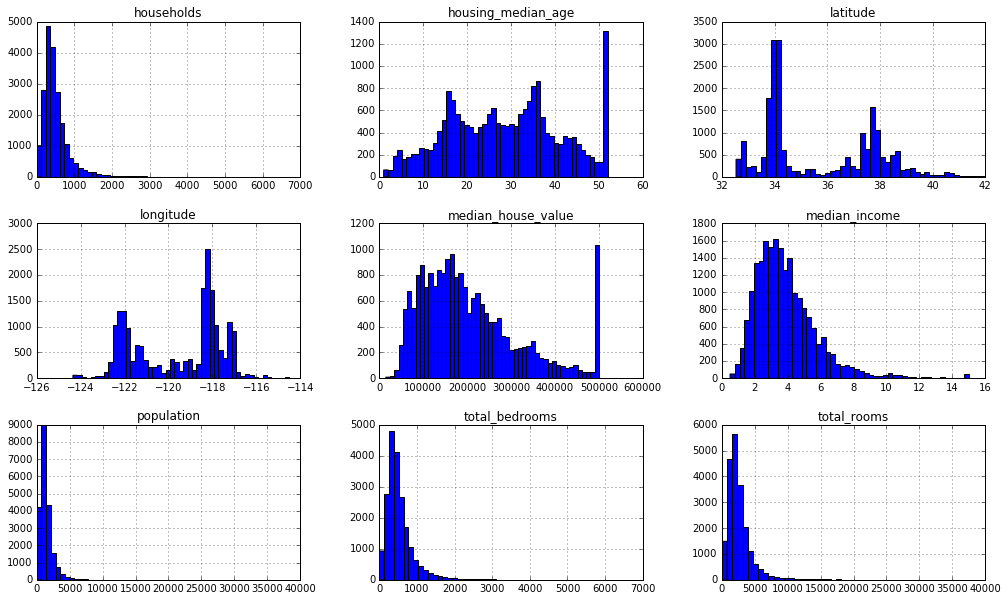

In [24]:
#Plotting histograms for various features
housing.hist(bins=50, figsize=(17,10))
plt.show()

In [25]:
#Spliting the dataset into train(80%) and test(20%) using random sampling 
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


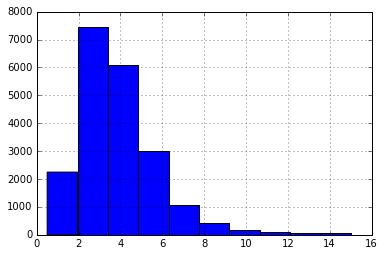

In [26]:
# Analysing the distribution of Housing dataset to check for skewness
housing["median_income"].hist()

In [27]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 14, 5.0, inplace=True)
housing["income_cat"].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

As the dataset is skewed to the right (positively skewed), we use stratified sampling to ensure the we have equal distribution of samples in both the test and train dataset. 

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [29]:
#Lets compare the error for the randomly sampled dataset and stratified sampled dataset with respect to the original dataset
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [30]:
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.068944,0.064922,0.069041,-5.832748,0.140548
6.0,0.025775,0.024709,0.025678,-4.135338,-0.375940
7.0,0.009157,0.008721,0.009205,-4.761905,0.529101
8.0,0.005087,0.005572,0.005087,9.523810,0.000000
9.0,0.002422,0.002665,0.002422,10.000000,0.000000
10.0,0.000678,0.000969,0.000727,42.857143,7.142857


In [31]:
# We see that the strat error is lesser than rond error, that is the distribution of overall dataset matches closely to that of strat dataset over rand dataset.
# Now lets drop the income_cat as this column is not correlate to the price of the house
for set in (strat_train_set, strat_test_set):
    set.drop("income_cat", axis=1, inplace=True)

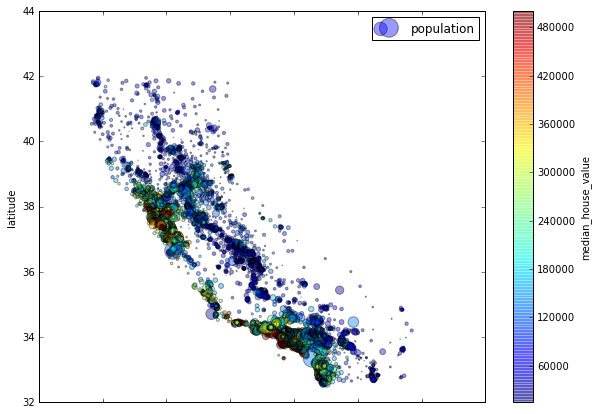

In [38]:
#lets plot to see the role of latitude, longitude and population on the price of the house taken together

housing.plot(kind="scatter", x="longitude", y="latitude", s=housing['population']/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, alpha=0.4, figsize=(10,7),)
plt.legend()
plt.show()

In [39]:
# Let's see the correlation indices of all the features to determine which ones to include and which to exclude in our analysis

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.668189
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [57]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# As the attribute total_bedrooms has some missing value lets substitute blank spaces with median
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
15698,-122.46,37.79,52.0,899.0,96.0,304.0,110.0,14.2959,NEAR BAY
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,INLAND
9026,-118.86,34.07,16.0,1409.0,244.0,970.0,172.0,8.0144,NEAR OCEAN
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,INLAND
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN


In [58]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.iloc[21:24]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
21,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590
22,-120.66,35.49,17.0,4422.0,945.0,2307.0,885.0,2.8285
23,-117.25,34.16,37.0,1709.0,278.0,744.0,274.0,3.7188


In [59]:
# Converting text to numbers
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 3, 4, ..., 1, 0, 3], dtype=int64)

In [60]:
# Sparse matrix for categorical variables with multiple categories 
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [61]:
# Feature Scaling
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
housing_prepared = num_pipeline.fit_transform(housing_num)

In [62]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
encoder.fit_transform(housing_cat)

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer()),
    ])

preparation_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
housing_prepared = preparation_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15788621,  0.77388697,  0.74440696, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44259512,  1.0077626 ,  1.85708974, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.18471864, -1.3403487 ,  0.18806557, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58431009, -0.72291704, -1.56043594, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7801323 , -0.84920988,  0.18806557, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43760023,  0.99840757,  1.85708974, ...,  0.        ,
         1.        ,  0.        ]])

***Prediction Model 1: Linear Regression***

In [63]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
# let's try the full pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = preparation_pipeline.transform(some_data)

print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 209300.18149413  661078.1135578   210913.91718561   57466.84542129
  186707.41879655]
Labels:		 [286600.0, 500001.0, 196900.0, 46300.0, 254500.0]


In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Root Mean Square Error:",lin_rmse)
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
print("Mean Absolute Error:",lin_mae)

Root Mean Square Error: 68321.7051304
Mean Absolute Error: 49237.4978192


***Prediction Model 2: Decision Tree Regressor***

In [70]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)

from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

def display_scores(scores):
    print("Root mean square error scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Root mean square error scores: [ 68262.53439997  64690.12021593  66978.28593533  69160.84997068
  70667.37565178  75698.78386113  68755.30742608  71687.35547241
  74580.58358348  72214.54215159]
Mean: 70269.5738668
Standard deviation: 3217.54155766


***Prediction Model 3: Random Forest Regressor***

In [80]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Root mean square error scores: [ 51262.6406342   49959.00192482  51671.17354803  54803.13653085
  53396.84353043  57685.10579285  50200.94879319  51511.5901573
  55115.14124714  53485.49837652]
Mean: 52909.1080535
Standard deviation: 2325.24919639


***Prediction Model 4: Support Vector Regressor***

In [73]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
print("Root mean square error:",svm_rmse)

Root mean square error: 110914.791356


***Fine Tuning the Hyperparameters for Random Forest Regressor***

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor()
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error')
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DB7A0D4BA8>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DB7A3DCEB8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [75]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49331.1763582 {'n_estimators': 132, 'max_features': 6}
49261.2835608 {'n_estimators': 196, 'max_features': 7}
49902.9652842 {'n_estimators': 137, 'max_features': 4}
49756.1181686 {'n_estimators': 112, 'max_features': 4}
49707.8806797 {'n_estimators': 180, 'max_features': 4}
54701.2221917 {'n_estimators': 166, 'max_features': 1}
49756.2448425 {'n_estimators': 160, 'max_features': 4}
49522.7770958 {'n_estimators': 121, 'max_features': 5}
64099.8225022 {'n_estimators': 2, 'max_features': 5}
51720.8819357 {'n_estimators': 153, 'max_features': 2}


In [ ]:
# Let’s display importance scores next to corresponding attribute names
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

Apparently only one ocean_proximity category is really useful, so you could try dropping the others. Also the best RMSE was obtained using Randomized approach with RMSE value of 49261.2835608 